In [82]:
import pandas as pd

In [83]:
#Paso 1: Cargando el dataset
path = 'E:/Bootcamp/telco/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [84]:
# 2.Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")
df.head()

Número de registros duplicados: 0


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [85]:
#Eliminar datos duplicados
df = df.drop_duplicates()

In [86]:
# 3. Asegurarse de que todas las columnas coincidan con los tipos de datos indicados
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)
df['tenure'] = df['tenure'].astype(int)
df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [87]:
# 4. Identificar y solucionar inconsistencia en valores categóricos
df['gender'] = df['gender'].str.strip().str.lower().replace({'female': 'Female', 'male': 'Male'})
df['Partner'] = df['Partner'].str.strip().str.lower().replace({'yes': 'Yes', 'no': 'No'})
df['Dependents'] = df['Dependents'].str.strip().str.lower().replace({'yes': 'Yes', 'no': 'No'})
df['PhoneService'] = df['PhoneService'].str.strip().str.lower().replace({'yes': 'Yes', 'no': 'No'})
df['MultipleLines'] = df['MultipleLines'].str.strip()
df['InternetService'] = df['InternetService'].str.strip().str.lower()
df['OnlineSecurity'] = df['OnlineSecurity'].str.strip().str.lower()
df['OnlineBackup'] = df['OnlineBackup'].str.strip().str.lower()
df['DeviceProtection'] = df['DeviceProtection'].str.strip().str.lower()
df['TechSupport'] = df['TechSupport'].str.strip().str.lower()
df['StreamingTV'] = df['StreamingTV'].str.strip().str.lower()
df['StreamingMovies'] = df['StreamingMovies'].str.strip().str.lower()
df['Contract'] = df['Contract'].str.strip().str.lower()
df['PaperlessBilling'] = df['PaperlessBilling'].str.strip().str.lower()
df['PaymentMethod'] = df['PaymentMethod'].str.strip().str.lower()
df['Churn'] = df['Churn'].str.strip().str.lower()

In [88]:
# 5. Identificar y solucionar valores faltantes
df.fillna(value={'TotalCharges': 0}, inplace=True)

In [89]:
# 6. Identificar y solucionar puntos de datos inapropiados
# Ejemplo: Tenure no debe ser negativa
df = df[df['tenure'] >= 0]

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Exploración de Datos
## Visualizaciones Univariadas 

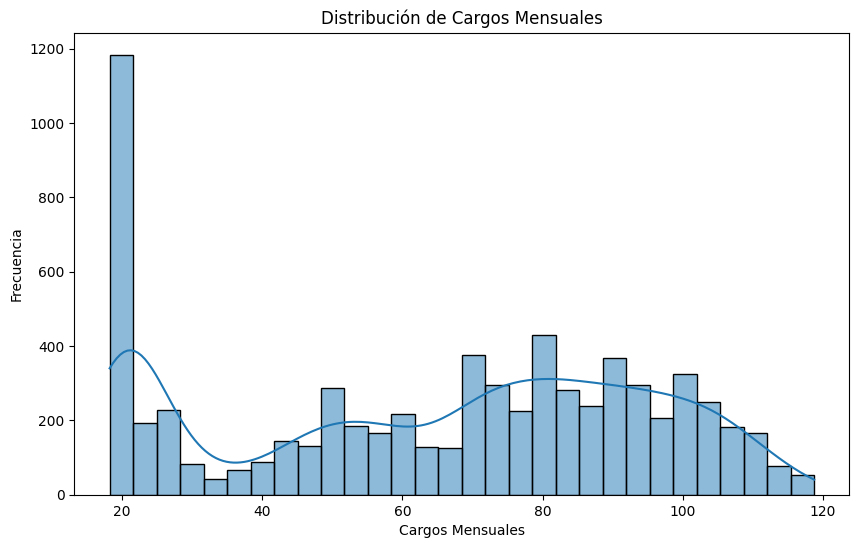

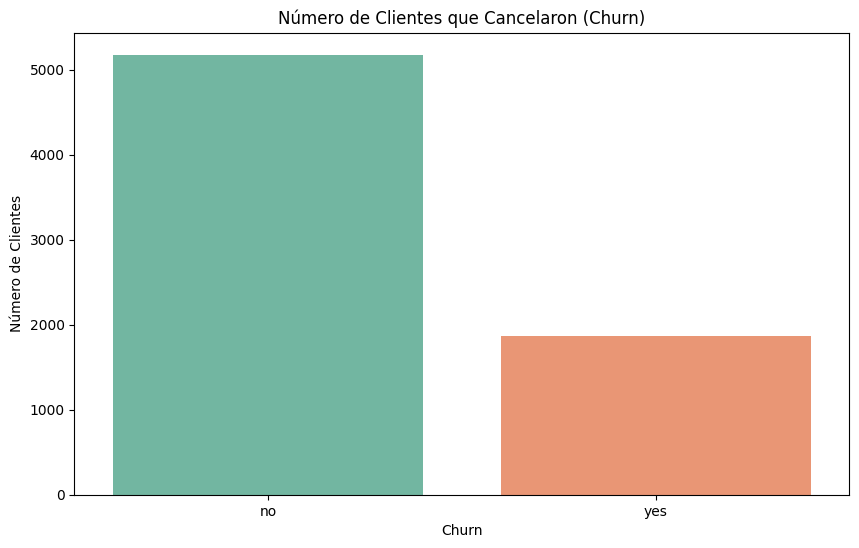

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histograma de Monthly Charges
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribución de Cargos Mensuales')
plt.xlabel('Cargos Mensuales')
plt.ylabel('Frecuencia')
plt.show()

# La mayoría de los clientes tienen cargos mensuales por debajo de 100, con una ligera tendencia a un pico alrededor de 60.

# 2. Gráfico de barras de Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', data=df, hue='Churn', palette='Set2', dodge=False)
plt.title('Número de Clientes que Cancelaron (Churn)')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()


# La mayoría de los clientes no han cancelado su servicio, pero hay un porcentaje notable que sí lo ha hecho.


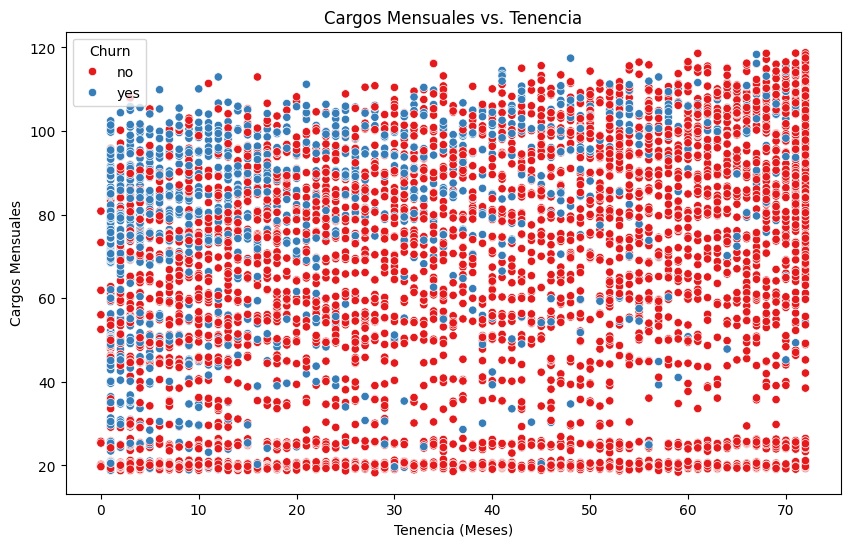

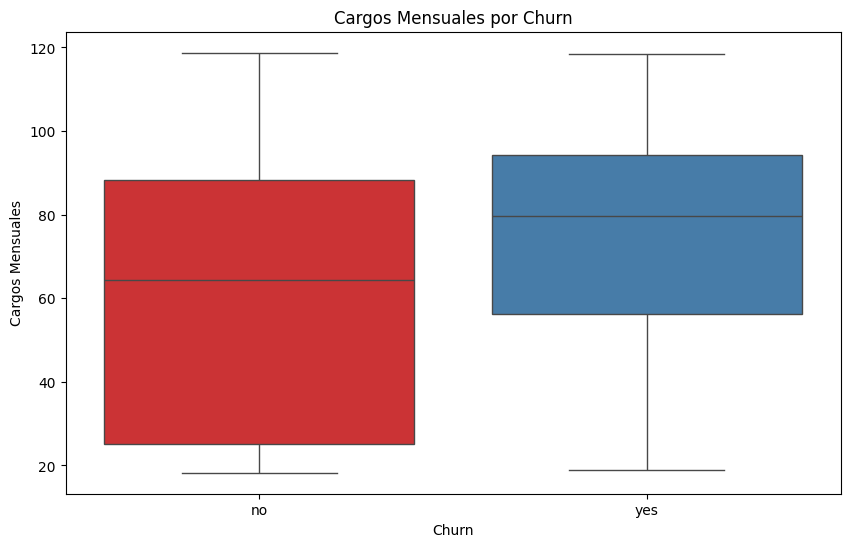

In [92]:
# 1. Gráfico de dispersión de Monthly Charges vs. Tenure
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df, palette='Set1')
plt.title('Cargos Mensuales vs. Tenencia')
plt.xlabel('Tenencia (Meses)')
plt.ylabel('Cargos Mensuales')
plt.legend(title='Churn')
plt.show()

#Los clientes con mayor tenencia tienden a tener cargos mensuales más bajos, y parece haber una tendencia en la que los clientes que cancelan (Churn) tiendan a tener cargos mensuales más altos.

# 2 Boxplot de Monthly Charges por Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, hue='Churn', palette='Set1', dodge=False)
plt.title('Cargos Mensuales por Churn')
plt.xlabel('Churn')
plt.ylabel('Cargos Mensuales')
plt.show()


#Hay una diferencia notable en los cargos mensuales entre los que cancelan y los que no, con aquellos que cancelan tendiendo a tener cargos más altos.
